In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import plotly.express as px
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from plotly.figure_factory import create_dendrogram
from scipy.cluster.hierarchy import fcluster, ward, dendrogram, leaves_list
from scipy.spatial.distance import pdist
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity

sns.set_style('white')

# 根据绘图需要选择数据以及特征

In [37]:
#t1_grp.csv中包含了852个人脑数据以及每个数据的25个特征
t1_grp_df = pd.read_csv('./t1_grp.csv', sep=',', header=0, index_col=0) 

#根据画图需要选择数据的6维或22维特征df

#6维
df = t1_grp_df[['Stems', 'Branches', 'Length', 'AverageBifurcationAngleLocal',
      'AverageBifurcationAngleRemote', 'HausdorffDimension']] 

#22维
# df = t1_grp_df 

#选取绘制散点图和特征对比图时的参考特征
hue_type = 'BrainRgn'
labels_ori = t1_grp_df[['BrainRgn', 'Age', 'Sex']]


for i in labels_ori.index:
    labels_ori.loc[i,'Age'] = int(labels_ori.loc[i,'Age']/5)*5

#根据需要选择脑区数据分析

# 1选取数据量较多的五个脑区
labels = labels_ori.loc[~labels_ori.BrainRgn.isin(['SMFG', 'SMIFG','SFG','MTG','IFG']), [hue_type]]
labels_ori = labels_ori[~labels_ori.BrainRgn.isin(['SMFG', 'SMIFG','SFG','MTG','IFG'])]

# 2选取PL和IPL脑区
# labels = labels_ori.loc[labels_ori.BrainRgn.isin(['PL','IPL']), [hue_type]]
# labels_ori = labels_ori[labels_ori.BrainRgn.isin(['PL','IPL'])]

# 3选取全部脑区
# labels = labels_ori[[hue_type]]


In [38]:
#选取除'BrainRgn', 'Age', 'Sex'三个特征外的22个可用于计算的线性特征
df = df.loc[labels.index,:]
# df = df.iloc[:, 3:]
x = df.values
df

,Stems,Branches,Length,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension
Name,,,,,,
00005_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_09_53.ano.eswc,8,86,2539.80,88.3595,60.3844,1.06136
00006_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_10_54.ano.eswc,8,68,2452.20,75.3405,55.8170,1.10491
00008_P001_T01-S001_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_11_10_02.ano.eswc,8,72,2360.38,76.2666,59.6023,1.07386
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28.ano.eswc,10,82,2208.47,68.6457,74.3453,1.11178
00014_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_31_14_30.ano.eswc,11,104,2826.81,69.6403,59.4337,1.10682
...,...,...,...,...,...,...
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_22_15_41.ano.eswc,8,56,1667.50,68.2542,55.4037,1.04172
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_25_09_12.ano.eswc,10,70,2082.93,77.3570,62.6581,1.05175
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_22_15_22.ano.eswc,5,75,1740.59,88.5365,58.5789,1.04628


# 绘制两两特征对比图

In [39]:
#数据特征标准化，用了std和pca两种方式
std = StandardScaler()
pca = PCA(0.99)
x_std = std.fit_transform(x)
print('x_std shape: ', x_std.shape)

x_pca = pca.fit_transform(x_std)
print('x_pca shape: ', x_pca.shape)

x_std shape:  (812, 6)
x_pca shape:  (812, 6)


<Figure size 1500x1500 with 0 Axes>

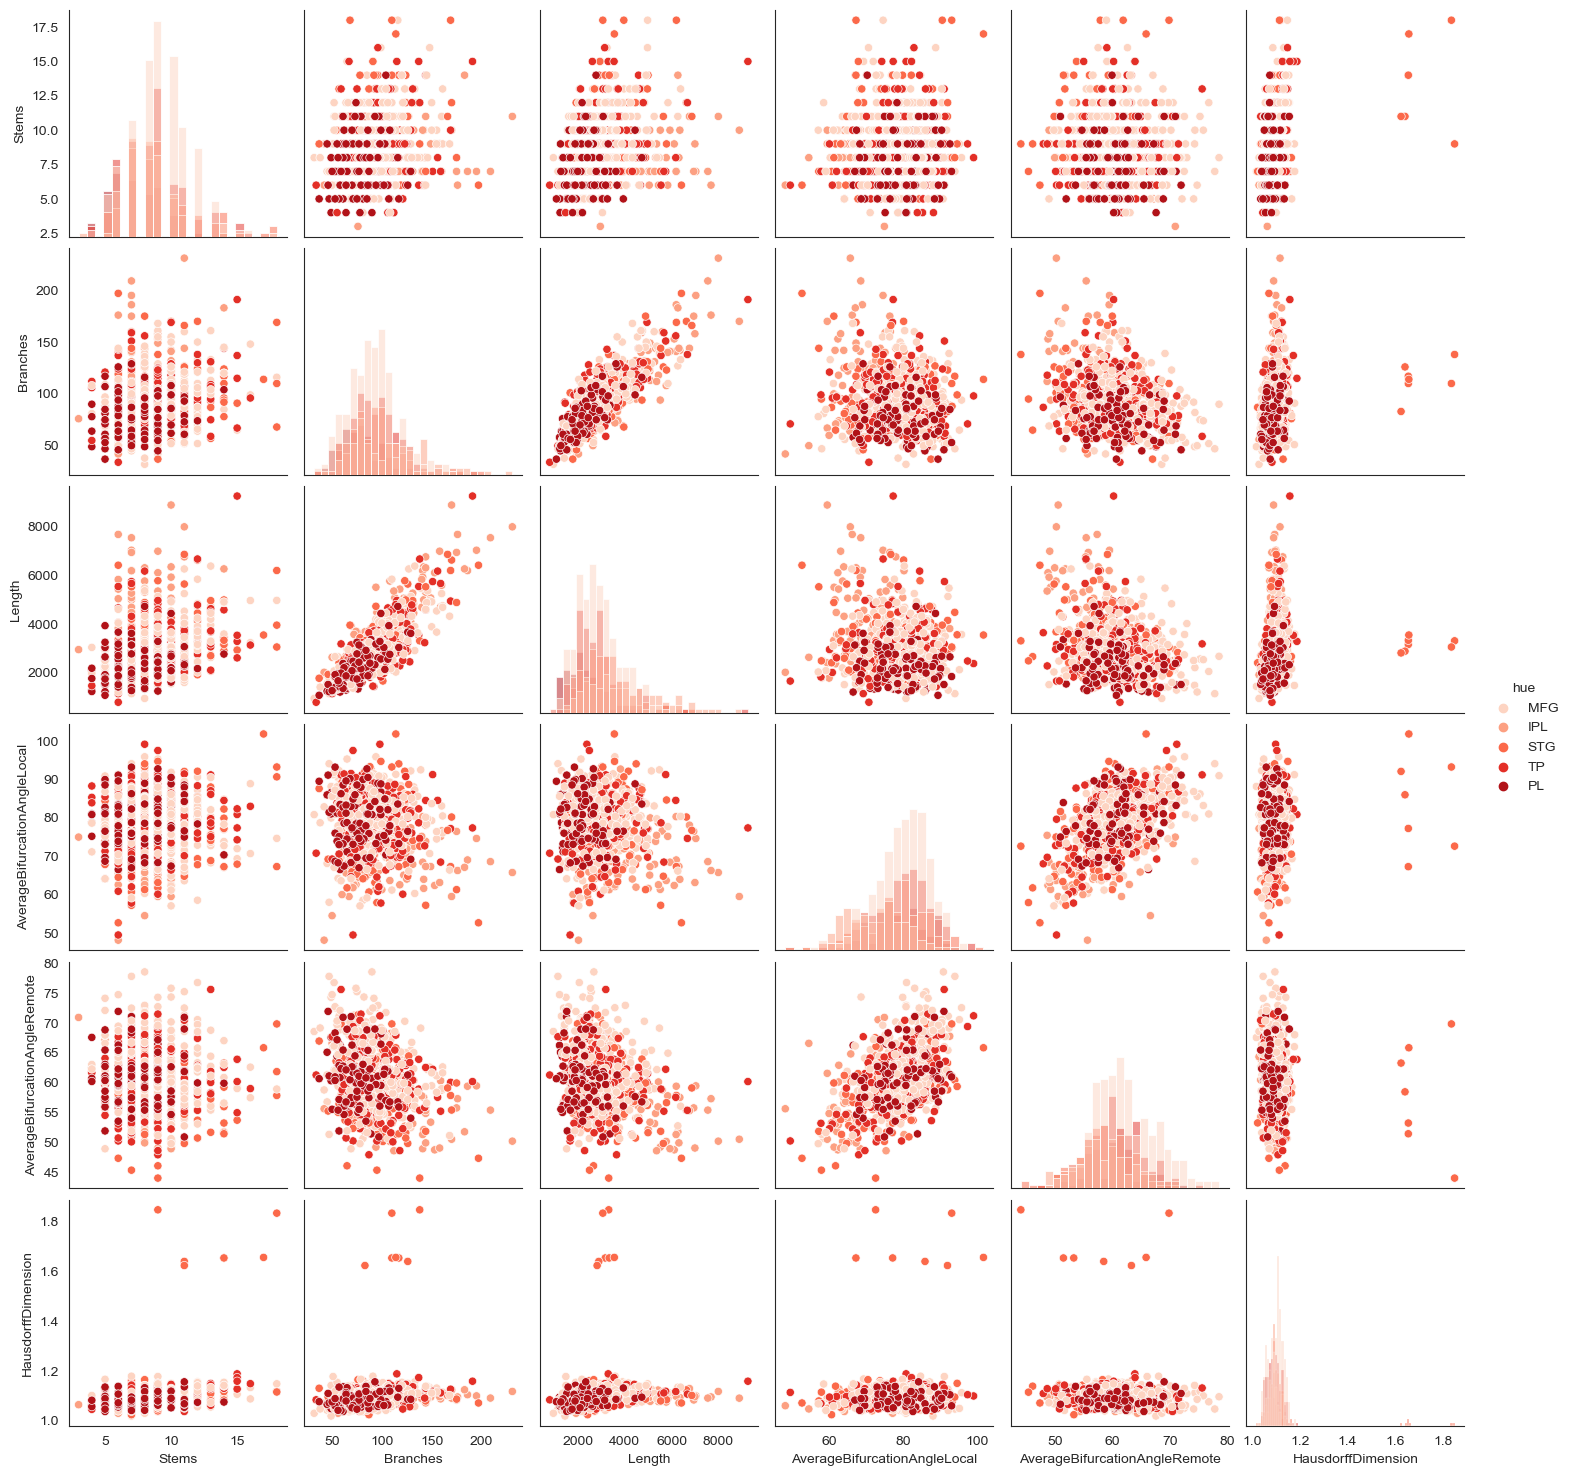

In [40]:
#以'hue'中选取的特征标签作为参考，绘制两两特征对比图
# 可选用年龄、脑区和性别作为特征参考
df['hue'] = labels
sns.set_style('white')
plt.figure(figsize=(15,15))
sns.pairplot(df, hue='hue', 
             palette='Reds',
#              palette='Set1', 
             diag_kind='hist')
plt.savefig('./pairplot_raw_'+hue_type+'.png', dpi=200)

#选择'Set2'绘图模式
# plt.figure(figsize=(15,15))
# sns.pairplot(df_std, hue='hue', palette='Set2', diag_kind='hist')
# plt.savefig('./pairplot_std_'+hue_type+'.png', dpi=200)

# 绘制特定标签参考下的特征散点图

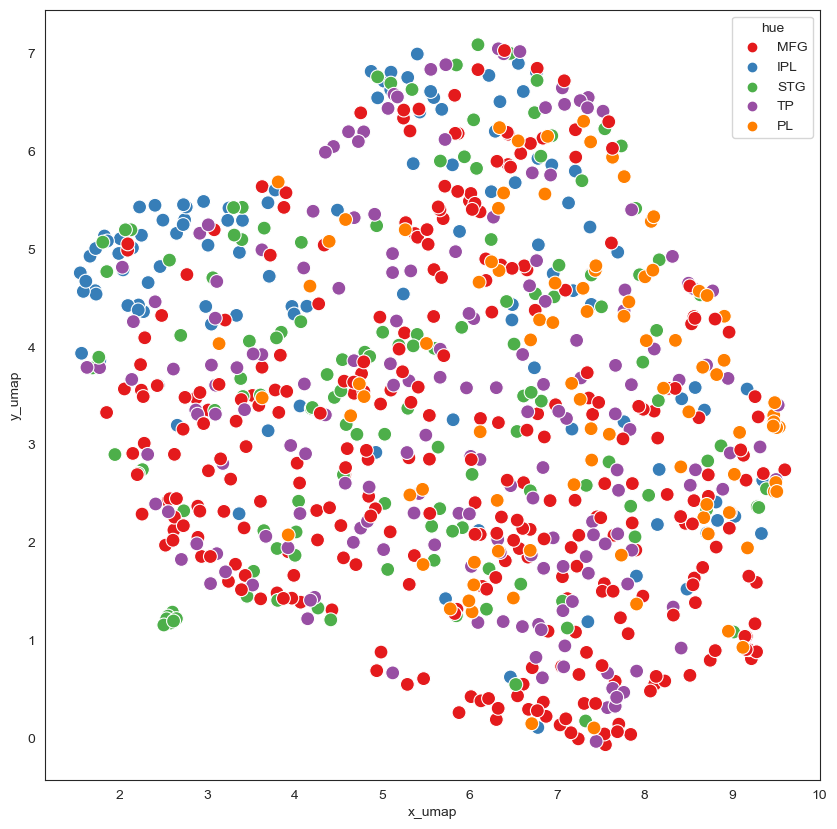

In [41]:
#对特征进行umap降维,为后续绘制散点图做准备
my_umap = UMAP(n_components=2,n_neighbors=30, random_state=10, min_dist=0.2)
x_umap = my_umap.fit_transform(x_std.copy())
figure_df = pd.DataFrame({
    'x_std':x_std[:,0], 
    'y_std':x_std[:,1],              
    'hue':df['hue'], 
#     'neuron_id':subtype_data.index.tolist()
    })
# figure_df['hue'] = figure_df['hue'].astype(float)
# figure_df
figure_df['x_umap'] = x_umap[:,0]
figure_df['y_umap'] = x_umap[:,1]


# 以'hue'特征标签为参考绘制散点分布图，可选择以脑区、年龄、性别作为参考，也可选取特定脑区作为参考，绘制6维或22维特征图
# 实验结果表明，IPL、MFG、STG以及PL脑区在特征分布上形成了明显的梯度，TP相对来说较为分散
# 性别与年龄两个参照并不能区分神经元数据的相关特征
# PL和IPL两个相邻脑区相对其他三个脑区的特征分布更为聚合
# 采用22维特征值进行降维时脑区数据的差异分布更明显
plt.figure(figsize=(10,10))
sns.scatterplot(x=figure_df['x_umap'], y=figure_df['y_umap'], hue=figure_df['hue'],
               palette='Set1',
#              palette=sns.diverging_palette(240, 10, n=6, as_cmap=True),
               s=100,
#                hue_norm=(-100,100)
               )
plt.savefig('./umap_'+hue_type+'.png', dpi=200)

In [130]:
#两种聚类评价
print('umap layout下的聚类评价')
print(metrics.silhouette_score(x_umap, labels, metric='euclidean')) # -1, +1 （越高越好）
print(metrics.calinski_harabasz_score(x_umap, labels, )) # 0, +无穷 （越接近0越好）
print(metrics.davies_bouldin_score(x_umap, labels, )) # 0， +无穷 （越接近0越好）

print('pca layout下的聚类评价')
print(metrics.silhouette_score(x_pca, labels, metric='euclidean')) # -1, +1 （越高越好）
print(metrics.calinski_harabasz_score(x_pca, labels, )) # 0, +无穷 （越接近0越好）
print(metrics.davies_bouldin_score(x_pca, labels, )) # 0， +无穷 （越接近0越好）

umap layout下的聚类评价
-0.3577944
9.611251543353076
6.818688422068218


D:\ProgramData\Anaconda3\envs\neuronbeta\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\Anaconda3\envs\neuronbeta\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\Anaconda3\envs\neuronbeta\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
